<a href="https://colab.research.google.com/github/forrestrice/bridge-bots/blob/master/plot/bridge_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
I wanted to learn a bit more about pandas and matplotlib, so I imported my bridge records from my local club. It seems like there are a lot of cool potential applicaitons!

In [3]:
from google.colab import files
uploaded = files.upload()

Saving all_qt_results.csv to all_qt_results.csv


# Matchpoint Percentage Over Time

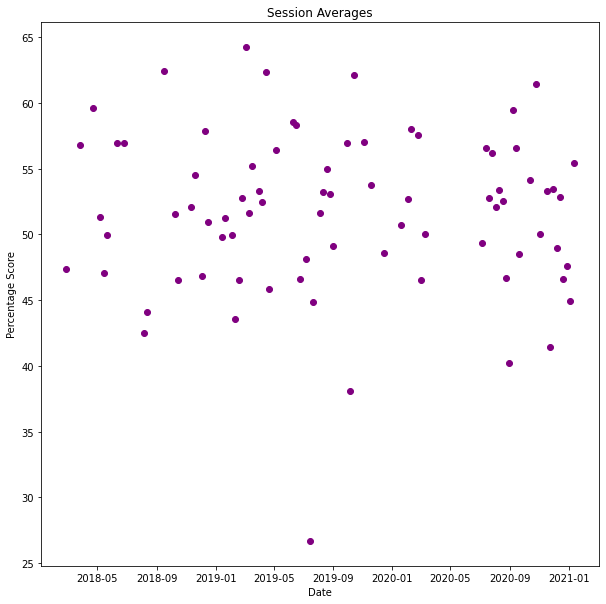

In [4]:
import io
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 30)

scores_df = pd.read_csv(io.BytesIO(uploaded['all_qt_results.csv']))
scores_df['play_date'] = pd.to_datetime(scores_df['play_date'])

#fix non-percentage scores
scores_df['score'] = scores_df['score'].apply(lambda s: s if s > 1 else 100 * s)
mp_scores_df = scores_df.where(scores_df['scoring_form'] != "imps")

team_df = mp_scores_df.groupby('play_date').agg(session_mean=('score','mean'))

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(team_df.index.values,
        team_df['session_mean'],
        color='purple')

ax.set(xlabel="Date",
       ylabel="Percentage Score",
       title="Session Averages")

plt.show()




# Matchpoint Percentage by Role when Declarer/Dummy

In [ ]:
offense_df = mp_scores_df.where(mp_scores_df['team_role'] == 'offense').groupby(['play_date', 'role'], as_index=False).agg(session_mean=('score','mean'))
declarer_df = offense_df.where(offense_df['role'] == 'declarer')
dummy_df = offense_df.where(offense_df['role'] == 'dummy')


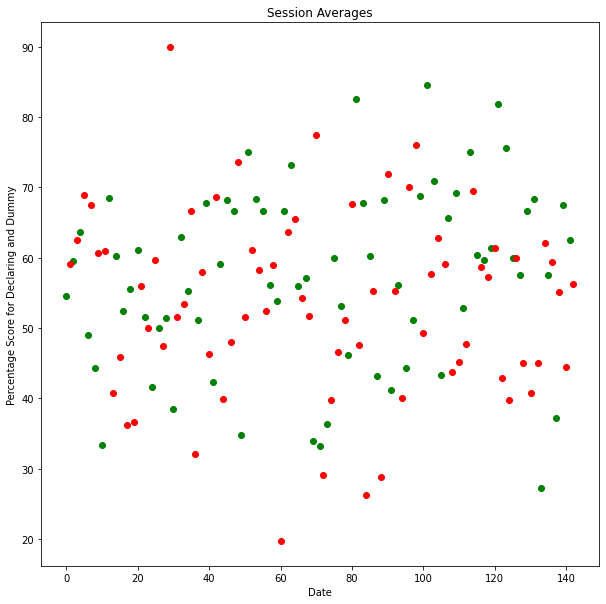

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(declarer_df.index.values,
        declarer_df['session_mean'],
        color='green')


ax.scatter(dummy_df.index.values,
        dummy_df['session_mean'],
        color='red')

ax.set(xlabel="Date",
       ylabel="Percentage Score for Declaring and Dummy",
       title="Session Averages")

plt.show()

In [ ]:
display(mp_scores_df.groupby([mp_scores_df.play_date.dt.year, mp_scores_df.role]).agg(role_mean=('score','mean'), count=('score', 'count')).sort_values(['play_date','role_mean']).reset_index())

,play_date,role,role_mean,count
0,2018.0,defense_third,45.772503,107
1,2018.0,defense_lead,51.971070,101
2,2018.0,dummy,55.043522,101
3,2018.0,declarer,55.574727,108
4,2019.0,unknown,32.142857,1
5,2019.0,defense_lead,46.652843,190
6,2019.0,defense_third,50.060851,184
7,2019.0,dummy,52.878938,193
8,2019.0,declarer,57.120063,172
9,2020.0,defense_third,43.735943,130


# Matchpoint Percentage by High Card Points

In [ ]:
display(mp_scores_df.groupby([mp_scores_df.play_date.dt.year, mp_scores_df.hcp]).agg(score_mean=('score','mean'), count=('score', 'count')).sort_values(['play_date','hcp']).reset_index())

,play_date,hcp,score_mean,count
0,2018.0,1.0,31.666667,3
1,2018.0,2.0,51.717172,6
2,2018.0,3.0,73.294785,7
3,2018.0,4.0,40.333491,16
4,2018.0,5.0,57.896014,24
5,2018.0,6.0,49.080888,27
6,2018.0,7.0,50.643750,42
7,2018.0,8.0,46.478065,41
8,2018.0,9.0,52.443883,36
9,2018.0,10.0,56.853978,31


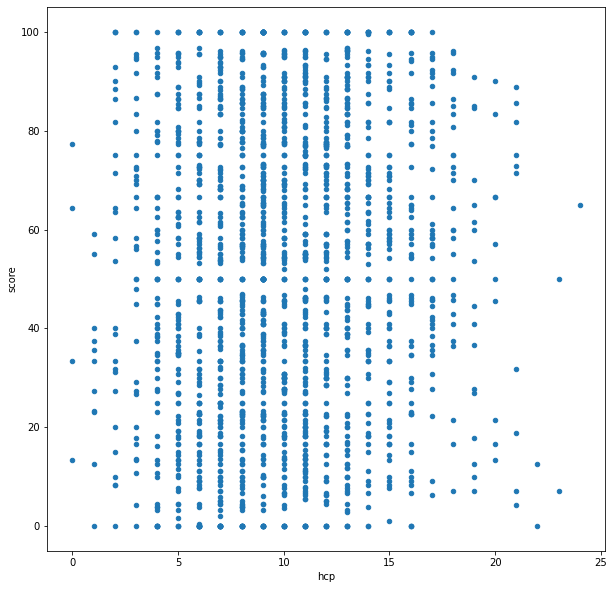

In [ ]:
mp_scores_df.plot.scatter(x='hcp', y='score', figsize=(10,10))

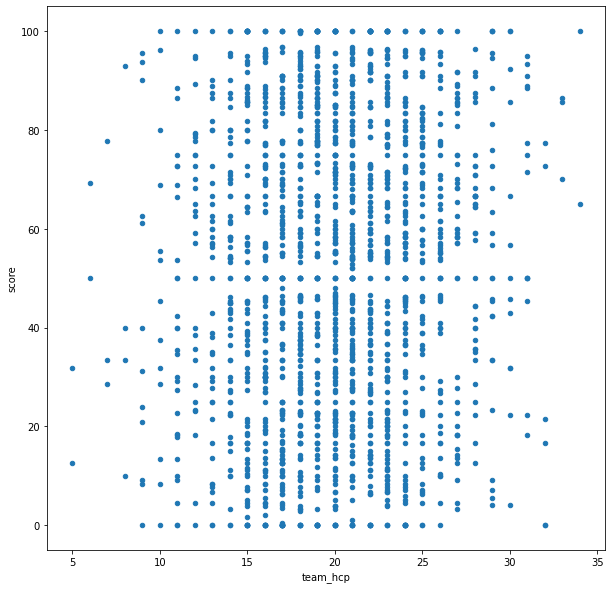

In [ ]:
mp_scores_df.plot.scatter(x='team_hcp', y='score', figsize=(10,10))

# Matchpoint Percentage by Contract Level

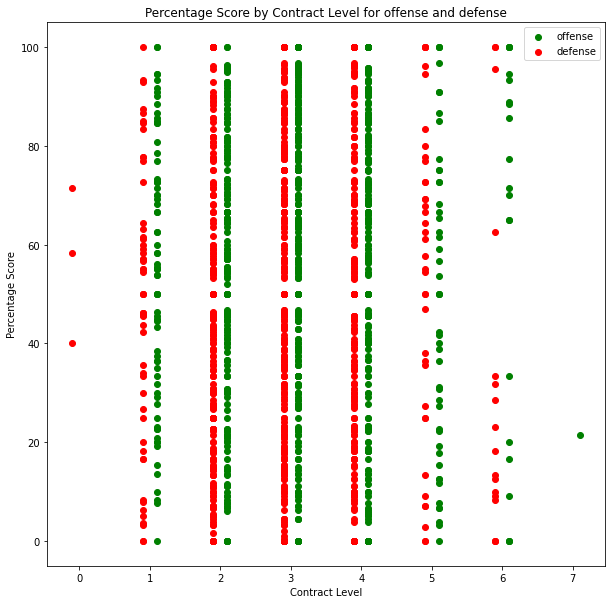

In [ ]:
offense_hands_df = mp_scores_df[mp_scores_df['team_role'] == 'offense']
defense_hands_df = mp_scores_df[mp_scores_df['team_role'] == 'defense']

fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(offense_hands_df['contract_level'].astype(int) + 0.1,
        offense_hands_df['score'],
        color='green',
        label='offense')


ax.scatter(defense_hands_df['contract_level'].astype(int) - 0.1,
        defense_hands_df['score'],
        color='red',
        label='defense')

ax.set(xlabel="Contract Level",
       ylabel="Percentage Score",
       title="Percentage Score by Contract Level for offense and defense")

ax.legend()
plt.show()


# Matchpoint Percentage by Suit and Date

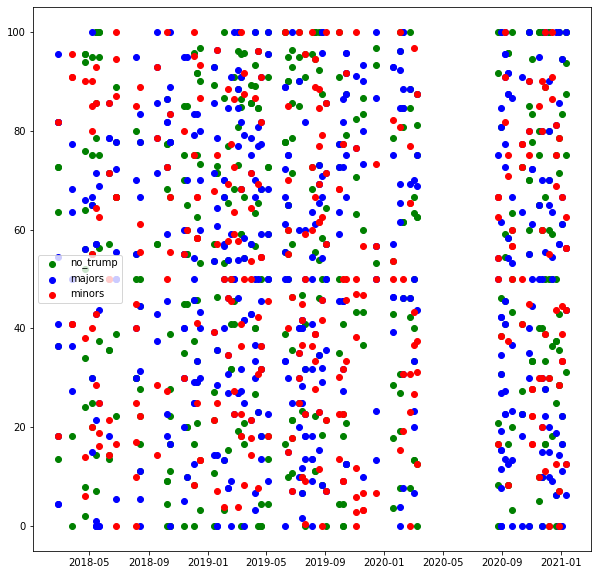

In [ ]:
notrump_hands = mp_scores_df[mp_scores_df['contract_suit'] == 'BiddingSuit.NO_TRUMP']
major_hands = mp_scores_df[mp_scores_df['contract_suit'].isin(['BiddingSuit.SPADES', 'BiddingSuit.HEARS'])]
minor_hands = mp_scores_df[mp_scores_df['contract_suit'].isin(['BiddingSuit.CLUBS', 'BiddingSuit.DIAMONDS'])]

'''
ax.scatter(declarer_df.index.values,
        declarer_df['session_mean'],
        color='green')
'''

fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(notrump_hands['play_date'],
        notrump_hands['score'],
        color='green',
        label='no_trump')

ax.scatter(major_hands['play_date'],
        major_hands['score'],
        color='blue',
        label='majors')

ax.scatter(minor_hands['play_date'],
        minor_hands['score'],
        color='red',
        label='minors')

'''
ax.scatter(defense_hands_df['contract_level'].astype(int) - 0.1,
        defense_hands_df['score'],
        color='red',
        label='defense')

ax.set(xlabel="Contract Level",
       ylabel="Percentage Score",
       title="Percentage Score by Contract Level for offense and defense")
'''
ax.legend()
plt.show()


In [ ]:
display(mp_scores_df)
for col in mp_scores_df.columns:
  print(col)


,role,team_role,score,contract_level,contract_suit,doubled,redoubled,play_date,scoring_form,suits_shape,sorted_shape,hcp,team_hcp
0,defense_third,defense,43.333333,3,BiddingSuit.NO_TRUMP,False,False,2019-11-18,matchpoints,3154.0,5431.0,9.0,14.0
1,defense_lead,defense,46.666667,3,BiddingSuit.DIAMONDS,False,False,2019-11-18,matchpoints,5323.0,5332.0,15.0,18.0
2,defense_lead,defense,86.666667,1,BiddingSuit.NO_TRUMP,False,False,2019-11-18,matchpoints,3343.0,4333.0,12.0,23.0
3,defense_third,defense,3.333333,2,BiddingSuit.CLUBS,False,False,2019-11-18,matchpoints,4243.0,4432.0,5.0,18.0
4,declarer,offense,83.333333,3,BiddingSuit.NO_TRUMP,False,False,2019-11-18,matchpoints,2245.0,5422.0,7.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,unknown,unknown,58.330000,unknown,unknown,unknown,unknown,2020-08-03,matchpoints,4513.0,5431.0,8.0,27.0
1969,unknown,unknown,50.000000,unknown,unknown,unknown,unknown,2020-08-03,matchpoints,2515.0,5521.0,9.0,18.0
1970,unknown,unknown,91.670000,unknown,unknown,unknown,unknown,2020-08-03,matchpoints,5422.0,5422.0,17.0,27.0
1971,unknown,unknown,4.170000,unknown,unknown,unknown,unknown,2020-08-03,matchpoints,3334.0,4333.0,3.0,30.0


role
team_role
score
contract_level
contract_suit
doubled
redoubled
play_date
scoring_form
suits_shape
sorted_shape
hcp
team_hcp
